In [27]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from common import *

pd.options.display.float_format = '{:,.1f}'.format

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:42093")
client

Client Scheduler: tcp://127.0.0.1:42093 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 6 Cores: 24 Memory: 33.67 GB


# End-to-end Latency

In [18]:
DATA_DIRS = {
#     "SLOG-B 0% mh 0% mp": "slog-benchmark-latency-mh0mp0",
#     "SLOG-B 100% mh 0% mp": "slog-benchmark-latency-mh100mp0",
#     "SLOG-B 0% mh 100% mp": "slog-benchmark-latency-mh0mp100",
#     "SLOG-HA 0% mh 100% mp": "slog-benchmark-ha-latency-mh0mp100",
#     "SLOG-B 100% mh 100% mp": "slog-benchmark-latency-mh100mp100",
#     "HA 0% mh 0% mp": "slog-benchmark-ha-latency-mh0mp0",
#     "HA 100% mh 0% mp": "slog-benchmark-ha-latency-mh100mp0",
#     "HA 100% mh 100% mp": "slog-benchmark-ha-latency-mh100mp100",
#     "DDR 0% mh 0% mp": "slog-benchmark-ddr-latency-mh0mp0",
#     "DDR 100% mh 0% mp": "slog-benchmark-ddr-latency-mh100mp0",
#     "DDR 0% mh 100% mp": "slog-benchmark-ddr-latency-mh0mp100",
#     "DDR 100% mh 100% mp": "slog-benchmark-ddr-latency-mh100mp100",
    "bad": "slog-benchmark-2021-02-22-09-03-37",
}

latency_dfs = {}
for label, path in DATA_DIRS.items():
    txn_time_df = load_txn_time(path)
    latency_us = txn_time_df['EXIT_SERVER_TO_CLIENT'] - txn_time_df['ENTER_SERVER']
    latency_dfs[label] = latency_us[latency_us > 0] / 1000
    print(f'{label}\n{latency_dfs[label].describe()}\n')

bad
count   400,000.0
mean     40,751.5
std      35,605.3
min           6.4
25%       9,217.2
50%      19,963.5
75%      81,720.7
max      97,511.7
dtype: float64



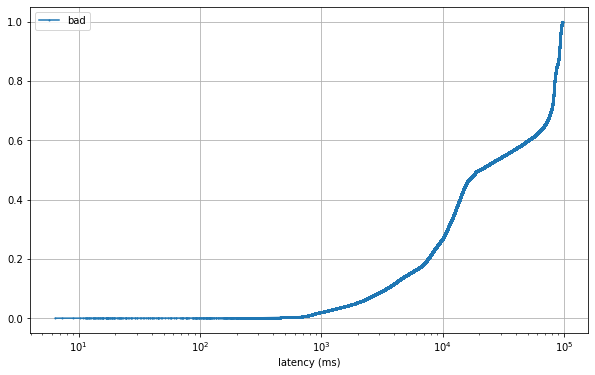

In [19]:
plt.figure(figsize=(10, 6))

for label, latency_df in latency_dfs.items():
    x = np.sort(latency_df)
    y = np.arange(1, len(x)+1) / len(x)

    plt.xscale('log')
    plt.grid('on')
    plt.xlabel('latency (ms)')
    plt.plot(x, y, marker='.', markersize=2, label=label)

plt.legend()

# Latency Breakdown

## Load data

In [29]:
DATA_DIR = "slog-benchmark-2021-02-22-09-03-37"
txn_time_df = load_txn_time(DATA_DIR)
txn_time_df

,machine,DISPATCHED,ENTER_FORWARDER,ENTER_INTERLEAVER_IN_BATCH,ENTER_SCHEDULER,ENTER_SEQUENCER,ENTER_SERVER,ENTER_WORKER,EXIT_FORWARDER_TO_SEQUENCER,EXIT_INTERLEAVER,EXIT_SEQUENCER_IN_BATCH,EXIT_SERVER_TO_CLIENT,EXIT_SERVER_TO_FORWARDER,EXIT_WORKER,RETURN_TO_SERVER,is_mh,is_mp,sent_at,received_at
txn_id,,,,,,,,,,,,,,,,,,,
500001003,0,"1,614,002,634,123,757.0",nan,"1,614,002,633,986,099.0","1,614,002,634,123,748.0",nan,nan,"1,614,002,634,124,393.0",nan,"1,614,002,633,986,158.0",nan,nan,nan,"1,614,002,634,124,452.0",nan,0,1,1614002632341001,1614002634130078
500001003,3,"1,614,002,633,136,311.0","1,614,002,632,388,250.0","1,614,002,633,120,479.0","1,614,002,633,136,299.0","1,614,002,632,595,444.0","1,614,002,632,388,230.0","1,614,002,633,136,317.0","1,614,002,632,595,394.0","1,614,002,633,132,991.0","1,614,002,632,663,803.0","1,614,002,634,123,883.0","1,614,002,632,388,232.0","1,614,002,634,123,455.0","1,614,002,634,123,124.0",0,1,1614002632341001,1614002634130078
500003000,0,nan,"1,614,002,632,408,423.0",nan,nan,"1,614,002,632,570,926.0","1,614,002,632,408,410.0",nan,"1,614,002,632,560,243.0",nan,"1,614,002,632,654,244.0","1,614,002,634,593,924.0","1,614,002,632,408,411.0",nan,"1,614,002,634,587,895.0",0,1,1614002632342017,1614002634598637
500003000,5,"1,614,002,634,582,407.0",nan,"1,614,002,632,893,050.0","1,614,002,634,582,396.0",nan,nan,"1,614,002,634,582,716.0",nan,"1,614,002,634,581,446.0",nan,nan,nan,"1,614,002,634,582,906.0",nan,0,1,1614002632342017,1614002634598637
500003000,6,"1,614,002,633,869,993.0",nan,"1,614,002,633,597,977.0","1,614,002,633,869,980.0",nan,nan,"1,614,002,633,870,006.0",nan,"1,614,002,633,657,068.0",nan,nan,nan,"1,614,002,634,584,826.0",nan,0,1,1614002632342017,1614002634598637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999999005,4,"1,614,002,771,809,175.0",nan,"1,614,002,680,637,447.0","1,614,002,687,203,132.0",nan,nan,"1,614,002,771,809,206.0",nan,"1,614,002,680,637,531.0",nan,nan,nan,"1,614,002,771,809,294.0",nan,0,1,1614002680448244,1614002771823559
999999005,5,nan,"1,614,002,680,557,007.0",nan,nan,"1,614,002,680,617,272.0","1,614,002,680,437,850.0",nan,"1,614,002,680,616,489.0",nan,"1,614,002,680,626,435.0","1,614,002,771,812,518.0","1,614,002,680,437,855.0",nan,"1,614,002,771,812,400.0",0,1,1614002680448244,1614002771823559
999999005,7,"1,614,002,769,962,987.0",nan,"1,614,002,680,660,720.0","1,614,002,685,286,116.0",nan,nan,"1,614,002,769,962,997.0",nan,"1,614,002,680,662,177.0",nan,nan,nan,"1,614,002,771,833,052.0",nan,0,1,1614002680448244,1614002771823559


## Clean up

In [30]:
txn_time_parts_df = fill_common_values_and_remove_extras(txn_time_df)
txn_time_parts_df.set_index('machine', append=True, inplace=True, verify_integrity=True)
txn_time_parts_df['sent_at'] = normalize(txn_time_parts_df['sent_at'])
txn_time_parts_df.sort_values('sent_at', inplace=True)

## Compute latency per module per machine

In [31]:
pairs = {
    'Server': ('ENTER_SERVER', 'EXIT_SERVER_TO_FORWARDER'),
    'Forwarder': ('ENTER_FORWARDER', 'EXIT_FORWARDER_TO_SEQUENCER'),
    'MH Orderer': ('ENTER_MULTI_HOME_ORDERER', 'EXIT_MULTI_HOME_ORDERER'),
    'Sequencer': ('ENTER_SEQUENCER', 'EXIT_SEQUENCER_IN_BATCH'),
    'Interleaver': ('ENTER_INTERLEAVER_IN_BATCH', 'EXIT_INTERLEAVER'),
#     'Scheduler': ('ENTER_SCHEDULER', 'DISPATCHED'),
#     'Worker': ('ENTER_WORKER', 'EXIT_WORKER'),
#     'Server-end': ('RETURN_TO_SERVER', 'EXIT_SERVER_TO_CLIENT')
}

latency_df = pd.DataFrame()
labels_order = []
for label, pair in pairs.items():
    if pair[0] not in txn_time_parts_df or pair[1] not in txn_time_parts_df:
        continue
    latency_us = txn_time_parts_df[pair[1]] - txn_time_parts_df[pair[0]]
    latency_df[label] = latency_us[latency_us > 0] / 1000
    labels_order.append(label)

## Graphs

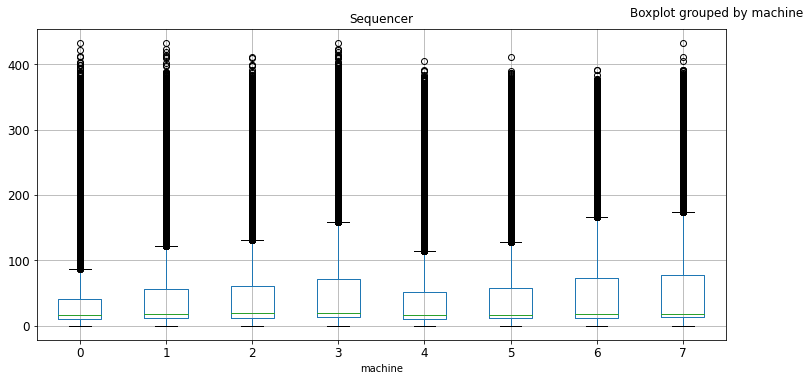

In [35]:
# axes = latency_df.boxplot(labels_order, by='machine', figsize=(20, 20), layout=(4, 2), fontsize=12)
axes = latency_df.boxplot(['Sequencer'], by='machine', figsize=(20, 20), layout=(4, 2), fontsize=12)
# for ax in axes.flatten():
#     ax.set_yscale('log')
plt.tight_layout()

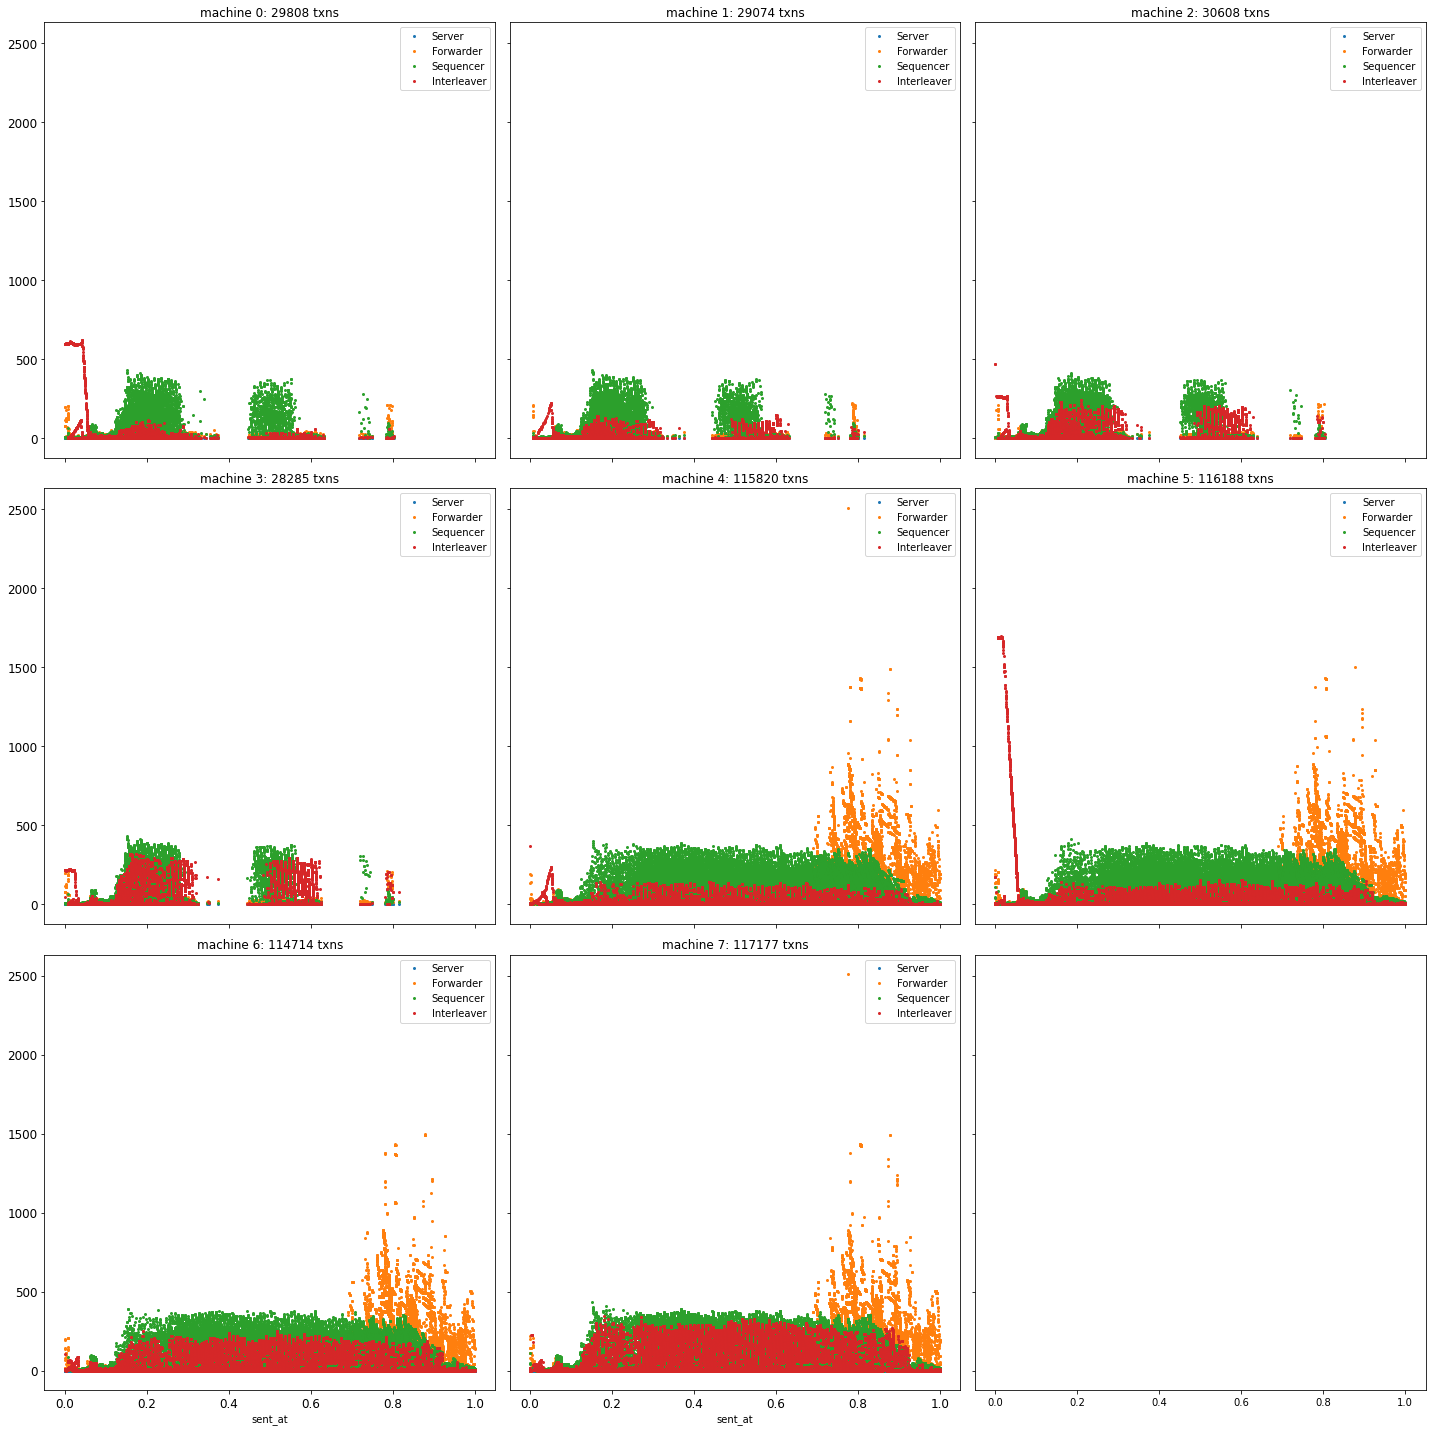

In [33]:
latency_with_sent_at = latency_df.assign(sent_at=txn_time_parts_df['sent_at'])
latency_with_sent_at.sort_values(by='sent_at', inplace=True)
machines = sorted(latency_with_sent_at.index.get_level_values(1).unique())

num_rows, num_cols = compute_rows_cols(len(machines))
f, axes = plt.subplots(num_rows, num_cols, sharex=True, sharey=True, figsize=(20, 20))

for i, m in enumerate(machines):
    r, c = i // num_cols, i % num_cols
    latency_per_machine = latency_with_sent_at[latency_with_sent_at.index.get_level_values(1) == m]
    latency_per_machine.plot(
        x='sent_at',
        y=['Server', 'Forwarder', 'Sequencer', 'Interleaver'],
        ax=axes[r, c],
        title=f'machine {m}: {len(latency_per_machine.index)} txns',
        fontsize=12,
        linewidth=0,
        markersize=2,
        marker='o',
        #logy=True,
    )

plt.tight_layout()

Scheduler
txn_id     machine
500175001  3         5.00
           0         9.00
dtype: float64
txn_id     machine
500175001  3         1,614,002,633,131,072.00
           0         1,614,002,634,118,129.00
Name: ENTER_SCHEDULER, dtype: float64
Worker
txn_id     machine
500175001  3         986,473.00
           0              56.00
dtype: float64
txn_id     machine
500175001  3         1,614,002,633,131,089.00
           0         1,614,002,634,118,654.00
Name: ENTER_WORKER, dtype: float64


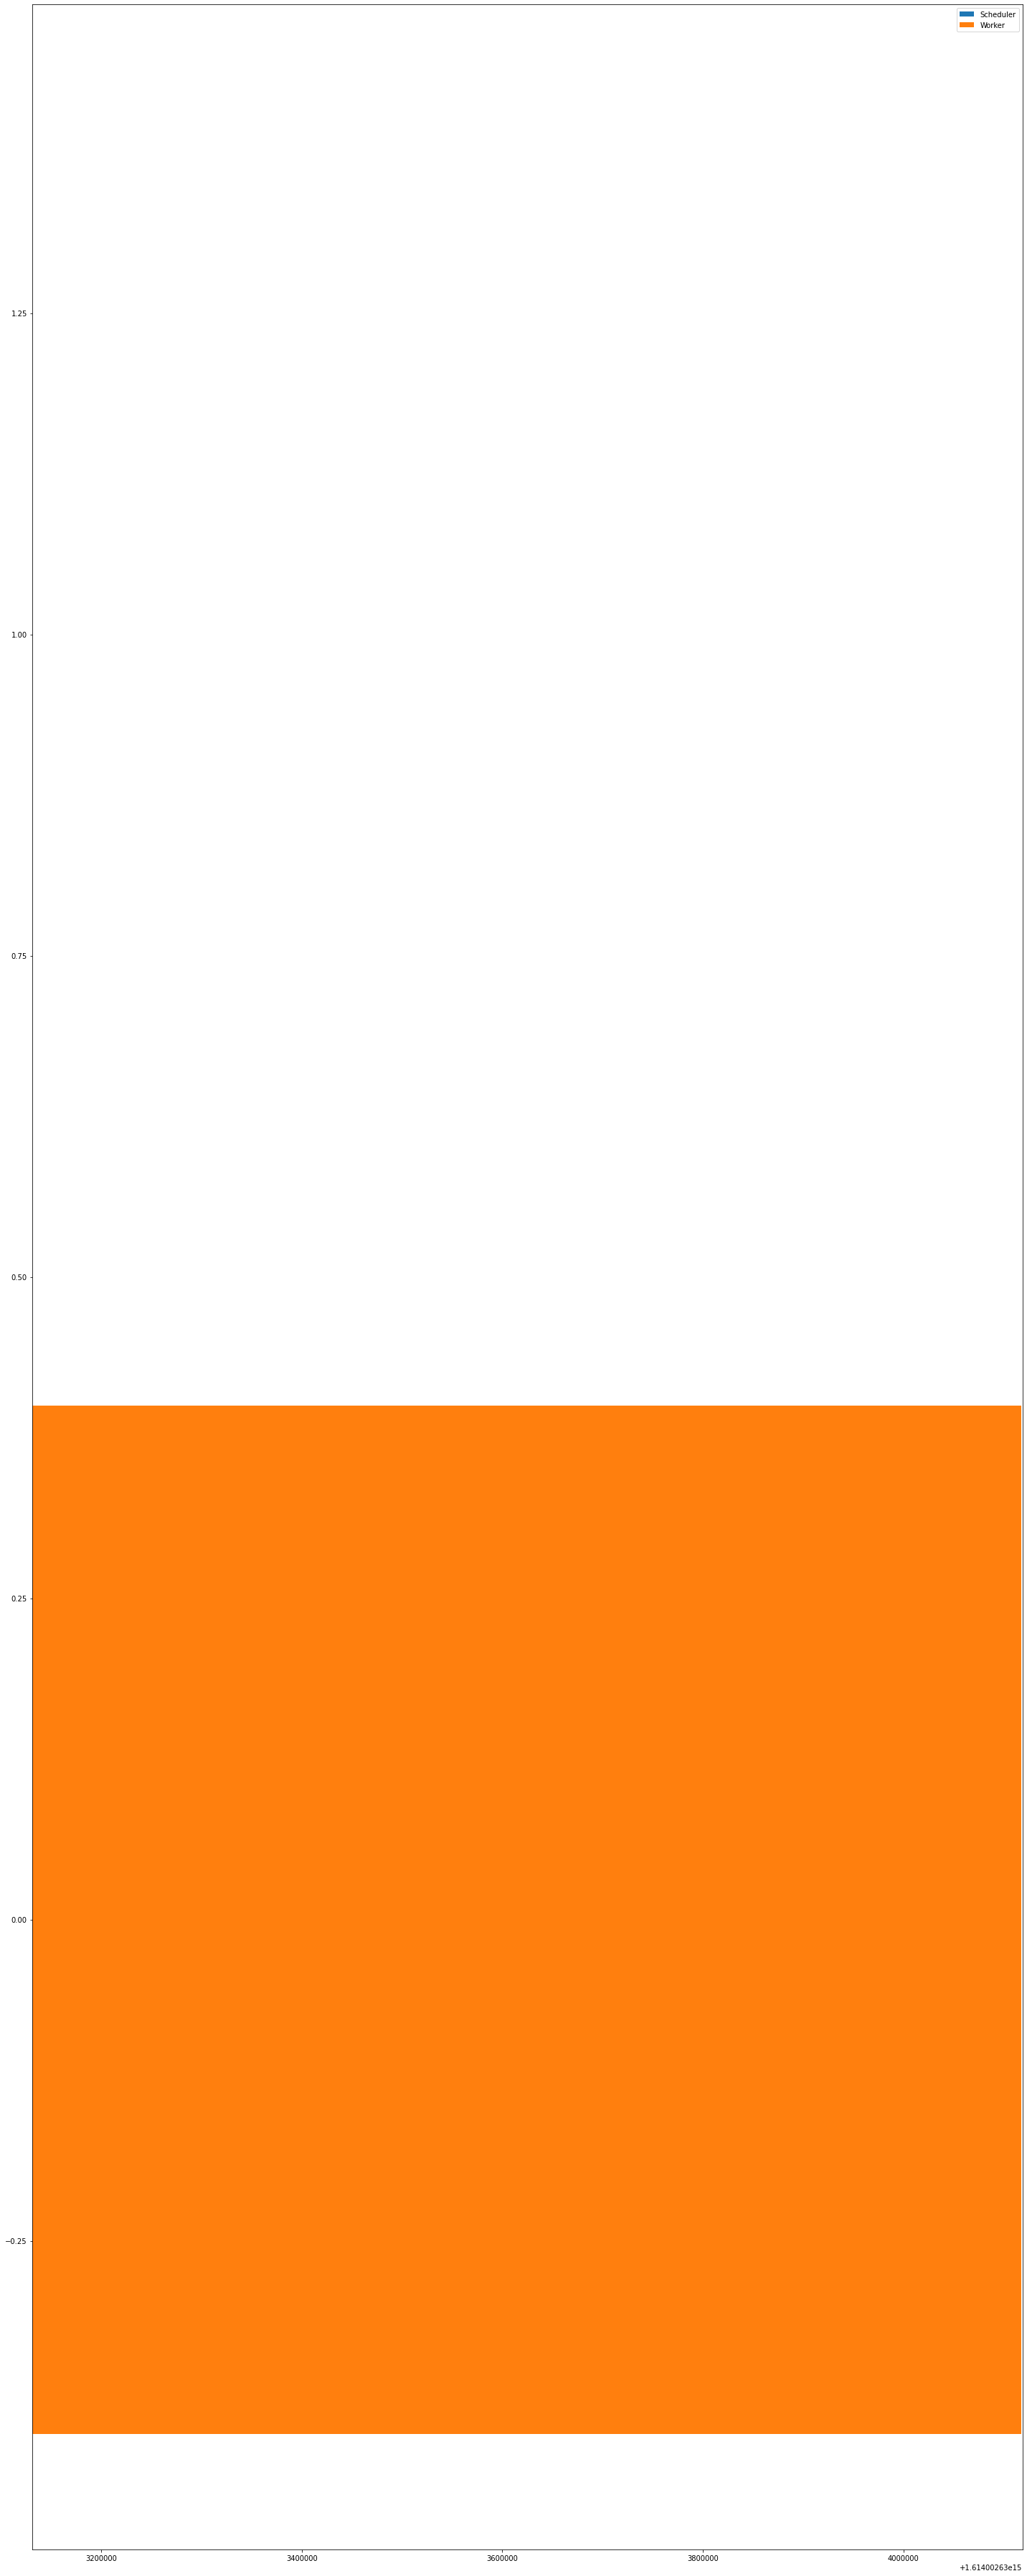

In [227]:
# txn_ids = np.random.choice(txn_time_parts_df[txn_time_parts_df['sent_at'] < 0.3].index.get_level_values(0), 300, replace=False)
# txn_ids = freeze[:100]
txn_ids = [500175001]

selected_txn_df = txn_time_parts_df.loc[txn_ids].sort_values(by='sent_at')


plt.figure(figsize=(20, 50))
for label, pair in pairs.items():
    if pair[0] not in selected_txn_df or pair[1] not in selected_txn_df:
        continue
    span = selected_txn_df[pair[1]] - selected_txn_df[pair[0]]
    plt.barh(range(len(selected_txn_df)), span, left=selected_txn_df[pair[0]], label=label)
    print(label)
    print(span)
    print(selected_txn_df[pair[0]])

plt.legend()
# plt.yticks(range(len(selected_txn_df)), selected_txn_df.index)
plt.tight_layout()

In [211]:
selected_txn_df

DISPATCHED  ENTER_FORWARDER  ENTER_INTERLEAVER_IN_BATCH  \
txn_id    machine                                                              
500175001 3        1.614003e+15     1.614003e+15                1.614003e+15   
          0        1.614003e+15     1.614003e+15                1.614003e+15   
501416006 6        1.614003e+15     1.614003e+15                1.614003e+15   
          5        1.614003e+15     1.614003e+15                1.614003e+15   
506673005 2        1.614003e+15     1.614003e+15                1.614003e+15   
...                         ...              ...                         ...   
648114006 6        1.614003e+15     1.614003e+15                1.614003e+15   
640859003 6        1.614003e+15     1.614003e+15                1.614003e+15   
          4        1.614003e+15     1.614003e+15                1.614003e+15   
649313006 6        1.614003e+15     1.614003e+15                1.614003e+15   
          7        1.614003e+15     1.614003e+15                1.614003e+15   

                   ENTER_SCHEDULER  ENTER_SEQUENCER  ENTER_SERVER  \
txn_id    machine                                                   
500175001 3           1.614003e+15     1.614003e+15  1.614003e+15   
          0           1.614003e+15     1.614003e+15  1.614003e+15   
501416006 6           1.614003e+15     1.614003e+15  1.614003e+15   
          5           1.614003e+15     1.614003e+15  1.614003e+15   
506673005 2           1.614003e+15     1.614003e+15  1.614003e+15   
...                            ...              ...           ...   
648114006 6           1.614003e+15     1.614003e+15  1.614003e+15   
640859003 6           1.614003e+15     1.614003e+15  1.614003e+15   
          4           1.614003e+15     1.614003e+15  1.614003e+15   
649313006 6           1.614003e+15     1.614003e+15  1.614003e+15   
          7           1.614003e+15     1.614003e+15  1.614003e+15   

                   ENTER_WORKER  EXIT_FORWARDER_TO_SEQUENCER  \
txn_id    machine                                              
500175001 3        1.614003e+15                 1.614003e+15   
          0        1.614003e+15                 1.614003e+15   
501416006 6        1.614003e+15                 1.614003e+15   
          5        1.614003e+15                 1.614003e+15   
506673005 2        1.614003e+15                 1.614003e+15   
...                         ...                          ...   
648114006 6        1.614003e+15                 1.614003e+15   
640859003 6        1.614003e+15                 1.614003e+15   
          4        1.614003e+15                 1.614003e+15   
649313006 6        1.614003e+15                 1.614003e+15   
          7        1.614003e+15                 1.614003e+15   

                   EXIT_INTERLEAVER  EXIT_SEQUENCER_IN_BATCH  \
txn_id    machine                                              
500175001 3            1.614003e+15             1.614003e+15   
          0            1.614003e+15             1.614003e+15   
501416006 6            1.614003e+15             1.614003e+15   
          5            1.614003e+15             1.614003e+15   
506673005 2            1.614003e+15             1.614003e+15   
...                             ...                      ...   
648114006 6            1.614003e+15             1.614003e+15   
640859003 6            1.614003e+15             1.614003e+15   
          4            1.614003e+15             1.614003e+15   
649313006 6            1.614003e+15             1.614003e+15   
          7            1.614003e+15             1.614003e+15   

                   EXIT_SERVER_TO_CLIENT  EXIT_SERVER_TO_FORWARDER  \
txn_id    machine                                                    
500175001 3                 1.614003e+15              1.614003e+15   
          0                 1.614003e+15              1.614003e+15   
501416006 6                 1.614003e+15              1.614003e+15   
          5                 1.614003e+15              1.614003e+15